# Coursera Capstone - Battle of Neighborhood

In [6]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [7]:
from urllib.request import urlopen # library used to query a website 
from bs4 import BeautifulSoup # library to used to parse the data returned from the website

## Scrap the Wiki page to capture data

In [12]:
# Query the website and return the html to the vaiable 'page'

soup = BeautifulSoup(urlopen("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"), 'html.parser')

# Find the required table from the captured data. 'find_all' finds all the <table> </table>

all_tables = soup.find_all('table')
table_required = soup.find('table',class_='wikitable sortable')

# Create dataframe using the required table

PostalCode=[]
Borough=[]
Neighborhood=[]

for row in table_required.findAll("tr"):
    cells = row.findAll("td")
 
    if len(cells) == 3:
        
        PostalCode.append(cells[0].find(text=True))
        Borough.append(cells[1].find(text=True))
        Neighborhood.append(cells[2].find(text=True))
        
headers = ['PostalCode','Borough','Neighborhood']

df_can = pd.DataFrame(columns = headers)
df_can['PostalCode'] = PostalCode
df_can['Borough'] = Borough
df_can['Neighborhood'] = Neighborhood

# Preview the dataframe before data preparation

df_can

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


## Data Preparation

In [13]:
# Converting "Not assigned" values -> NaN

df_can.replace('Not assigned',np.nan,inplace=True)

#Dropping the NaN values from the Borough column

df_can.dropna(subset=['Borough'],axis=0,inplace = True)

# Grouping the data and applying ',' in between the grouped data.

df_can = df_can.groupby(['PostalCode','Borough'])['Neighborhood'].apply(','.join).reset_index()

# Cleaning the data, by removing '\n' from the Dataset

df_can.replace(r'\n', '', regex = True, inplace = True)

# 'Not assigned' value in the Neighborhood column is replaced with the corresponding Borough value.

df_can['Neighborhood'].replace('Not assigned',df_can['Borough'],inplace=True)

df_can.shape

(103, 3)

In [17]:
df_can.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


## Latitude and Longitude

In [16]:
# Get and append the latitude and the longitude coordinates of each neighborhood
df_lat_lng = pd.read_csv('http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')
df_can_lat_lng = df_can.join(df_lat_lng.set_index('Postal Code'),on='PostalCode')
df_can_lat_lng.shape

(103, 5)

In [18]:
df_can_lat_lng.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Explore and cluster the neighborhoods

In [26]:
from sklearn.cluster import KMeans
#!pip install folium
import folium
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as colors

In [27]:
#coordinates of Toronto are 43.6532 , -79.3832

Latitude,Longitude = 43.6532,-79.3832
map_toronto = folium.Map(location=[Latitude,Longitude],zoom_start=10)

# add markers to the map.

for lat,lng,borough,neighborhood in zip(df_can_lat_lng['Latitude'],df_can_lat_lng['Longitude'],df_can_lat_lng['Borough'],df_can_lat_lng['Neighborhood']):
    label = '{}, {}'.format(neighborhood,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)
    
map_toronto

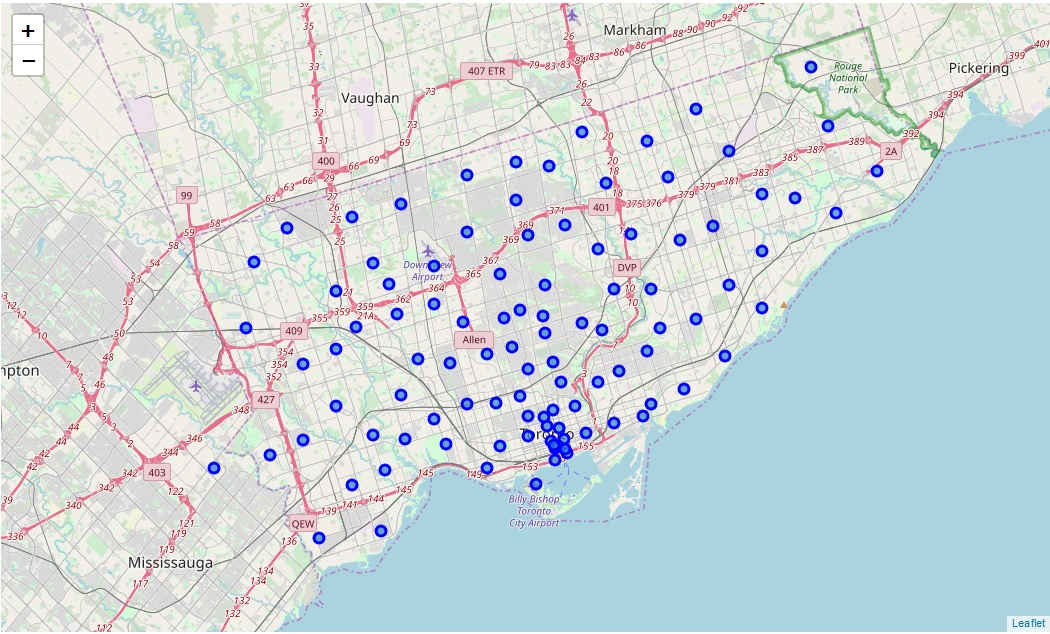

### Clustering - Run k-means into 6 clusters

In [28]:
# set number of clusters
kclusters = 6

# Clustering the neighborhood on basis of the features - latitude, longitude, and cluster labels

toronto_neighborhood_cluster = df_can_lat_lng.drop(['PostalCode','Borough','Neighborhood'],axis=1)

toronto_neighborhood_cluster.head()

,Latitude,Longitude,Cluster labels
0,43.806686,-79.194353,2
1,43.784535,-79.160497,2
2,43.763573,-79.188711,2
3,43.770992,-79.216917,2
4,43.773136,-79.239476,2


In [29]:
# run k-means clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_neighborhood_cluster)

# check cluster labels generated for each row in the dataframe

kmeans.labels_[0:10]

# add clustering labels

df_can_lat_lng_cluster=df_can_lat_lng
df_can_lat_lng_cluster['Cluster labels'] = kmeans.labels_

df_can_lat_lng_cluster.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster labels
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,3
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,3
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3


### Clustering Map - Visualize the analysis result and observations

In [30]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters.
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_can_lat_lng_cluster['Latitude'], df_can_lat_lng_cluster['Longitude'], df_can_lat_lng_cluster['Neighborhood'], df_can_lat_lng_cluster['Cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

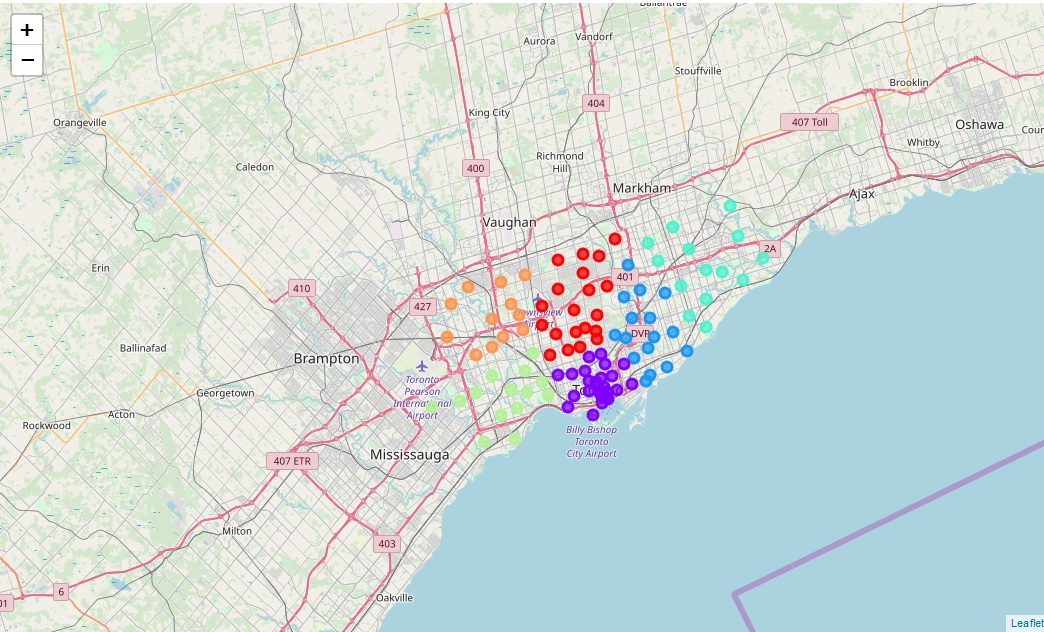